In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Data Understanding

In [62]:
#loading the data
loansdata=pd.read_csv("loan.csv", low_memory=False)
loansdata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [63]:
loansdata.shape

(39717, 111)

##### Observations : we have 39717 rows and 111 Columns

In [64]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [65]:
loansdata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [66]:
# Find the percentage of null values
loansdata_null = pd.DataFrame({'Count': loansdata.isnull().sum(), 'Percent': 100*loansdata.isnull().sum()/len(loansdata)})

In [67]:
#printing columns with null count more than 0
print(loansdata_null[loansdata_null['Percent'] > 80])

                                Count     Percent
mths_since_last_record          36931   92.985372
next_pymnt_d                    38577   97.129693
mths_since_last_major_derog     39717  100.000000
annual_inc_joint                39717  100.000000
dti_joint                       39717  100.000000
verification_status_joint       39717  100.000000
tot_coll_amt                    39717  100.000000
tot_cur_bal                     39717  100.000000
open_acc_6m                     39717  100.000000
open_il_6m                      39717  100.000000
open_il_12m                     39717  100.000000
open_il_24m                     39717  100.000000
mths_since_rcnt_il              39717  100.000000
total_bal_il                    39717  100.000000
il_util                         39717  100.000000
open_rv_12m                     39717  100.000000
open_rv_24m                     39717  100.000000
max_bal_bc                      39717  100.000000
all_util                        39717  100.000000


In [68]:
#removing the null columns having greater than 80%
loansdata1 = loansdata.dropna(axis=1, thresh=int(0.80*len(loansdata)))
loansdata1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### Observations : We have 53 columns after removing the rows having the 80% of missing values

In [69]:
loansdata1.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [70]:
# removing the unique value columns as they don't have impact on analysis
single_values_tobe_dropped =['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan']
loansdata1= loansdata1.drop(single_values_tobe_dropped,axis=1)
loansdata1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


##### Observations : We have 44 columns after removing the single values

In [71]:
# Removing the descriptive and redandant columns
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','url','zip_code']
loansdata1= loansdata1.drop(columns_tobe_dropped,axis=1)
loansdata1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [72]:
loansdata1['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [73]:
loansdata1['pub_rec_bankruptcies'].value_counts()/len(loansdata1.index)

0.0    0.940126
1.0    0.042148
2.0    0.000176
Name: pub_rec_bankruptcies, dtype: float64

##### more than 94% has zero, hence removing this column

In [74]:
loansdata1= loansdata1.drop('pub_rec_bankruptcies',axis=1)
loansdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   term                     39717 non-null  object 
 2   int_rate                 39717 non-null  object 
 3   installment              39717 non-null  float64
 4   grade                    39717 non-null  object 
 5   sub_grade                39717 non-null  object 
 6   emp_title                37258 non-null  object 
 7   emp_length               38642 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  purpose                  39717 non-null  object 
 14  title                 

##### Removed the Customer behaviour variables and filtered the required columns which contribute to the analysis i.e. columns which are being driving towards loan default. 

In [75]:
# considering the features which are important while applying the loan
df_LC = loansdata1.filter(['loan_amnt','addr_state','term','int_rate','installment','grade','issue_d','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','loan_status'])
df_LC.dtypes

loan_amnt                int64
addr_state              object
term                    object
int_rate                object
installment            float64
grade                   object
issue_d                 object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
loan_status             object
dtype: object

In [76]:
df_LC.head()

,loan_amnt,addr_state,term,int_rate,installment,grade,issue_d,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,loan_status
0,5000,AZ,36 months,10.65%,162.87,B,Dec-11,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,Fully Paid
1,2500,GA,60 months,15.27%,59.83,C,Dec-11,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,Charged Off
2,2400,IL,36 months,15.96%,84.33,C,Dec-11,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,Fully Paid
3,10000,CA,36 months,13.49%,339.31,C,Dec-11,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,Fully Paid
4,3000,OR,60 months,12.69%,67.79,B,Dec-11,B5,1 year,RENT,80000.0,Source Verified,other,17.94,Current


In [77]:
# removing the % symbol from interest rate and converting into float
df_LC['int_rate'] = df_LC['int_rate'].str.replace('%', '').astype(float)

In [78]:
# removing the characters symbol from employee length
df_LC['emp_length'] = df_LC['emp_length'].str.replace('years', '')
df_LC['emp_length'] = df_LC['emp_length'].str.replace('year', '')
df_LC['emp_length'] = df_LC['emp_length'].str.replace('+', '')
df_LC['emp_length'] = df_LC['emp_length'].str.replace('< ', '')
df_LC['emp_length'].astype(float)

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

In [79]:
#cleaning the term by trimming the months and convert into int
df_LC['term'] = df_LC['term'].str.replace('months', '')
df_LC['term'].astype(int)
df_LC.head()

,loan_amnt,addr_state,term,int_rate,installment,grade,issue_d,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,loan_status
0,5000,AZ,36,10.65,162.87,B,Dec-11,B2,10,RENT,24000.0,Verified,credit_card,27.65,Fully Paid
1,2500,GA,60,15.27,59.83,C,Dec-11,C4,1,RENT,30000.0,Source Verified,car,1.00,Charged Off
2,2400,IL,36,15.96,84.33,C,Dec-11,C5,10,RENT,12252.0,Not Verified,small_business,8.72,Fully Paid
3,10000,CA,36,13.49,339.31,C,Dec-11,C1,10,RENT,49200.0,Source Verified,other,20.00,Fully Paid
4,3000,OR,60,12.69,67.79,B,Dec-11,B5,1,RENT,80000.0,Source Verified,other,17.94,Current


### Target loan status variable converting into numerical for better understanding with charts

In [80]:
#removing the loan_status having current as they still in the process of paying the installments
df_LC.drop(df_LC.index[df_LC.loan_status=='Current'],axis=0,inplace=True)
df_LC['loan_status'] = df_LC['loan_status'].replace(['Fully Paid','Charged Off'],['0','1'])
df_LC.head()

,loan_amnt,addr_state,term,int_rate,installment,grade,issue_d,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,loan_status
0,5000,AZ,36,10.65,162.87,B,Dec-11,B2,10,RENT,24000.0,Verified,credit_card,27.65,0
1,2500,GA,60,15.27,59.83,C,Dec-11,C4,1,RENT,30000.0,Source Verified,car,1.00,1
2,2400,IL,36,15.96,84.33,C,Dec-11,C5,10,RENT,12252.0,Not Verified,small_business,8.72,0
3,10000,CA,36,13.49,339.31,C,Dec-11,C1,10,RENT,49200.0,Source Verified,other,20.00,0
5,5000,AZ,36,7.90,156.46,A,Dec-11,A4,3,RENT,36000.0,Source Verified,wedding,11.20,0


## Derived Columns

In [81]:
df_LC['grade_clean'] = df_LC['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [82]:
#convert the year column into datetime and then extract year and month from it
from datetime import datetime
df_LC['issue_d'] = df_LC['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [83]:
# extracting month and year from issue_date
df_LC['month'] = df_LC['issue_d'].apply(lambda x: x.month)
df_LC['year'] = df_LC['issue_d'].apply(lambda x: x.year)

In [84]:
#checking the no. of unique values
df_LC.nunique()

loan_amnt                870
addr_state                50
term                       2
int_rate                 370
installment            15022
grade                      7
issue_d                   55
sub_grade                 35
emp_length                10
home_ownership             5
annual_inc              5215
verification_status        3
purpose                   14
dti                     2853
loan_status                2
grade_clean                7
month                     12
year                       5
dtype: int64

In [85]:
df_LC=df_LC[df_LC.isnull().sum(axis=1)<=0]
df_LC.isnull().sum()

loan_amnt              0
addr_state             0
term                   0
int_rate               0
installment            0
grade                  0
issue_d                0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
loan_status            0
grade_clean            0
month                  0
year                   0
dtype: int64

In [86]:
df_LC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            37544 non-null  int64         
 1   addr_state           37544 non-null  object        
 2   term                 37544 non-null  object        
 3   int_rate             37544 non-null  float64       
 4   installment          37544 non-null  float64       
 5   grade                37544 non-null  object        
 6   issue_d              37544 non-null  datetime64[ns]
 7   sub_grade            37544 non-null  object        
 8   emp_length           37544 non-null  object        
 9   home_ownership       37544 non-null  object        
 10  annual_inc           37544 non-null  float64       
 11  verification_status  37544 non-null  object        
 12  purpose              37544 non-null  object        
 13  dti                  37544 non-

##### Converting the data types to numeric and categoricals

In [87]:
df_LC = df_LC.astype({"addr_state":'category',"grade_clean":'int64',"term":'int64',"grade":'category',"sub_grade":'category',"emp_length":'int64',"home_ownership":'category',"verification_status":'category',"purpose":'category',"loan_status":'int64'})
df_LC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            37544 non-null  int64         
 1   addr_state           37544 non-null  category      
 2   term                 37544 non-null  int64         
 3   int_rate             37544 non-null  float64       
 4   installment          37544 non-null  float64       
 5   grade                37544 non-null  category      
 6   issue_d              37544 non-null  datetime64[ns]
 7   sub_grade            37544 non-null  category      
 8   emp_length           37544 non-null  int64         
 9   home_ownership       37544 non-null  category      
 10  annual_inc           37544 non-null  float64       
 11  verification_status  37544 non-null  category      
 12  purpose              37544 non-null  category      
 13  dti                  37544 non-

# Univariate Analysis

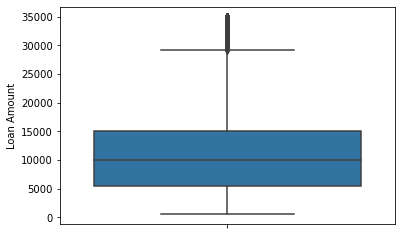

In [88]:
sns.boxplot( y=df_LC["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [89]:
df_LC["loan_amnt"].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

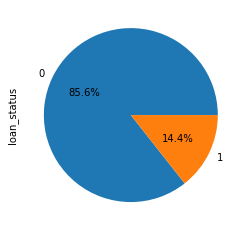

In [90]:
df_LC['loan_status'].value_counts().plot.pie(autopct="%.1f%%")

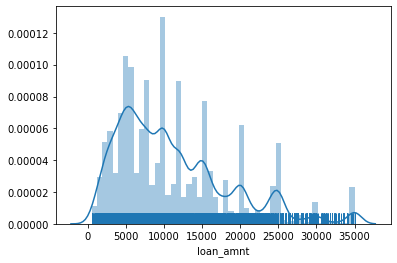

In [91]:
sns.distplot(df_LC['loan_amnt'],rug=True)
plt.show()

##### Inference: Loan amount is left skewed. Most of the loan amount given is 5 thousand

###### Let's create the bins for the loan amount

In [92]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt_bins'] = df_LC['loan_amnt'].apply(lambda x: loan_amount(x))


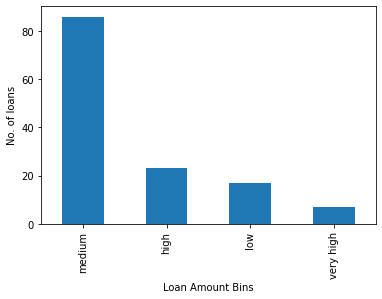

In [93]:
df['loan_amnt_bins'].value_counts().plot.bar()
plt.xlabel('Loan Amount Bins')
plt.ylabel('No. of loans')
plt.show()

##### Observation : Most of the loan amounts are in the medium bin i.e, between 5k to 15k

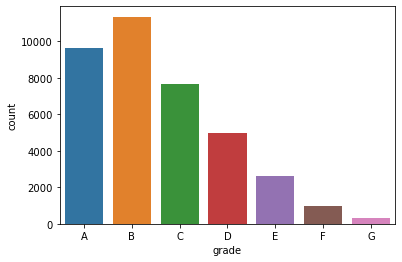

In [94]:
sns.countplot(x='grade', data=df_LC)
plt.show()

##### Observations: Most of the loans are high graded loans i.e, A, B and C.

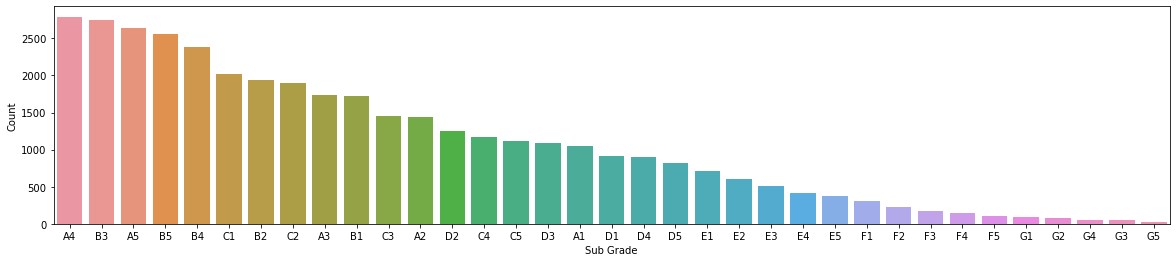

In [95]:
plt.figure(figsize=(20,4))
sns.countplot(df_LC.sub_grade, order=df_LC.sub_grade.value_counts().index)
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

##### Observation : Most of the loans are high graded loans which is similar to grade hence we can neglect this column in the analysis

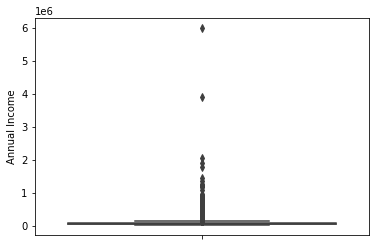

In [96]:
sns.boxplot(y=df_LC['annual_inc'])
plt.ylabel('Annual Income')
plt.show()

##### Observation : There are two incomes above 35k

In [97]:
df_LC['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

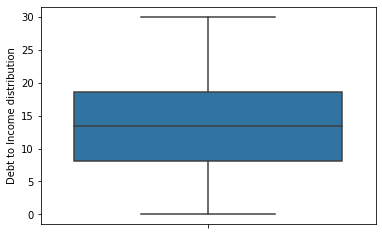

In [98]:
sns.boxplot(y=df_LC['dti'])
plt.ylabel('Debt to Income distribution')
plt.show()

##### Observation : there are no outliers 

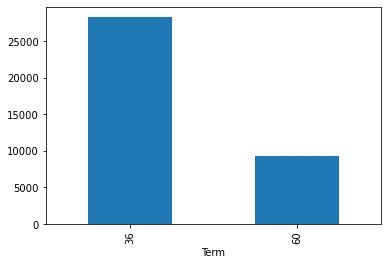

In [99]:
df_LC['term'].value_counts().plot.bar()
plt.xlabel('Term')
plt.show()

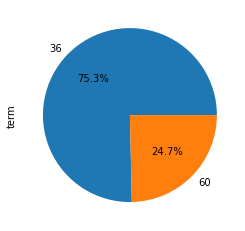

In [100]:
df_LC['term'].value_counts().plot.pie(autopct="%.1f%%")

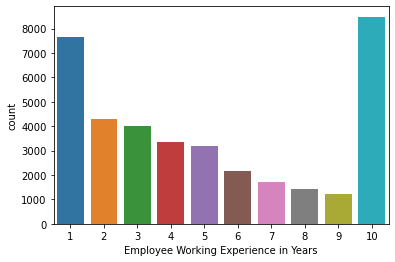

In [101]:
sns.countplot(x='emp_length', data=df_LC)
plt.xlabel('Employee Working Experience in Years')
plt.show()

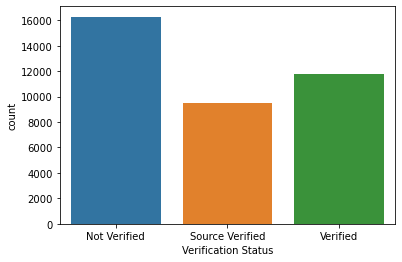

In [102]:
sns.countplot(x='verification_status', data=df_LC)
plt.xlabel('Verification Status')
plt.show()

##### Inference : As the Verification status having nearly equal amount of values, this field is not required for analysis

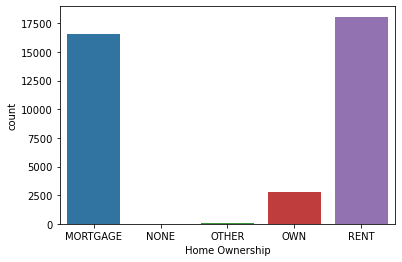

In [103]:
sns.countplot(x='home_ownership', data=df_LC)
plt.xlabel('Home Ownership')
plt.show()

##### Inference : Applicants having home rented Rental or Mortgage are applying for loans mostly

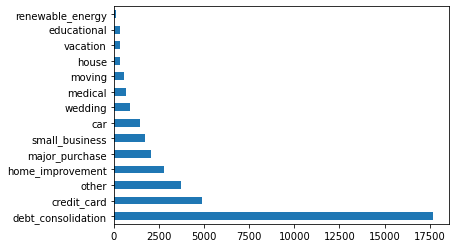

In [104]:
df_LC['purpose'].value_counts().plot.barh()
plt.show()

##### Inference : Top 5 loan purposes are Debt_Consolidation, credit_card, Other, home improvement and Major Purchase

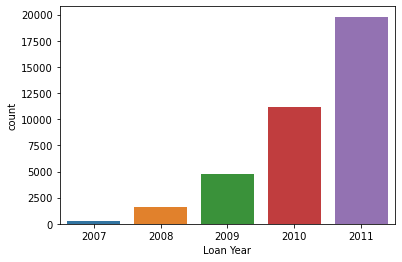

In [105]:
sns.countplot(x='year', data=df_LC)
plt.xlabel('Loan Year')
plt.show()

##### Observation : No. of loans getting increased from 2007 to 2011


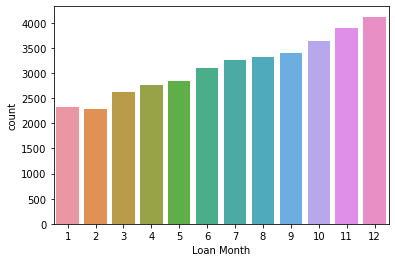

In [106]:
sns.countplot(x='month', data=df_LC)
plt.xlabel('Loan Month')
plt.show()

##### Observation : No. of Loans getting increased from Jan to Dec

# Segmented Univariate Analysis

In [107]:
pd.pivot_table(df_LC, index=['grade'],values=['dti','int_rate','term','installment','annual_inc'],aggfunc=np.median)

,annual_inc,dti,installment,int_rate,term
grade,,,,,
A,59000.0,11.500,223.94,7.49,36
B,58000.0,13.500,276.88,10.99,36
C,56000.0,14.080,277.98,13.49,36
D,60000.0,14.240,317.35,15.62,36
E,65000.0,14.395,384.00,17.51,60
F,72000.0,14.700,471.89,19.36,60
G,80000.0,14.730,562.68,20.90,60


##### Observation : 
##### 1)A, B,  C and D Grades are comes are in a bucket having low interest rate and 36 terms 
##### 2)E, F and G Grades are  comes are in a bucket having higher interest rate and 60 terms 
##### 3) dti does not have any much impact

In [108]:
pd.pivot_table(df_LC, index=['purpose'],values=['dti','int_rate','term','installment','annual_inc'],aggfunc=np.median)

,annual_inc,dti,installment,int_rate,term
purpose,,,,,
car,55000.0,10.635,162.870,10.370,36
credit_card,60000.0,14.710,311.110,11.490,36
debt_consolidation,58800.0,14.570,327.360,12.420,36
educational,42000.0,11.170,172.690,11.830,36
home_improvement,72000.0,10.550,265.080,11.110,36
house,63000.0,10.365,314.015,11.890,36
major_purchase,55000.0,10.380,186.970,10.750,36
medical,56360.0,12.455,190.520,11.480,36
moving,50000.0,11.530,156.030,11.250,36


##### Observation : 
##### 1)credit_card , debt_cosolidation, house and small business loans are having installment amounts
##### 2)home_improvement, renewable_energy, small_business and house applicants are having high annual income
##### 3) dti, interest rate and term does not have any much impact

# Bivariate Analysis

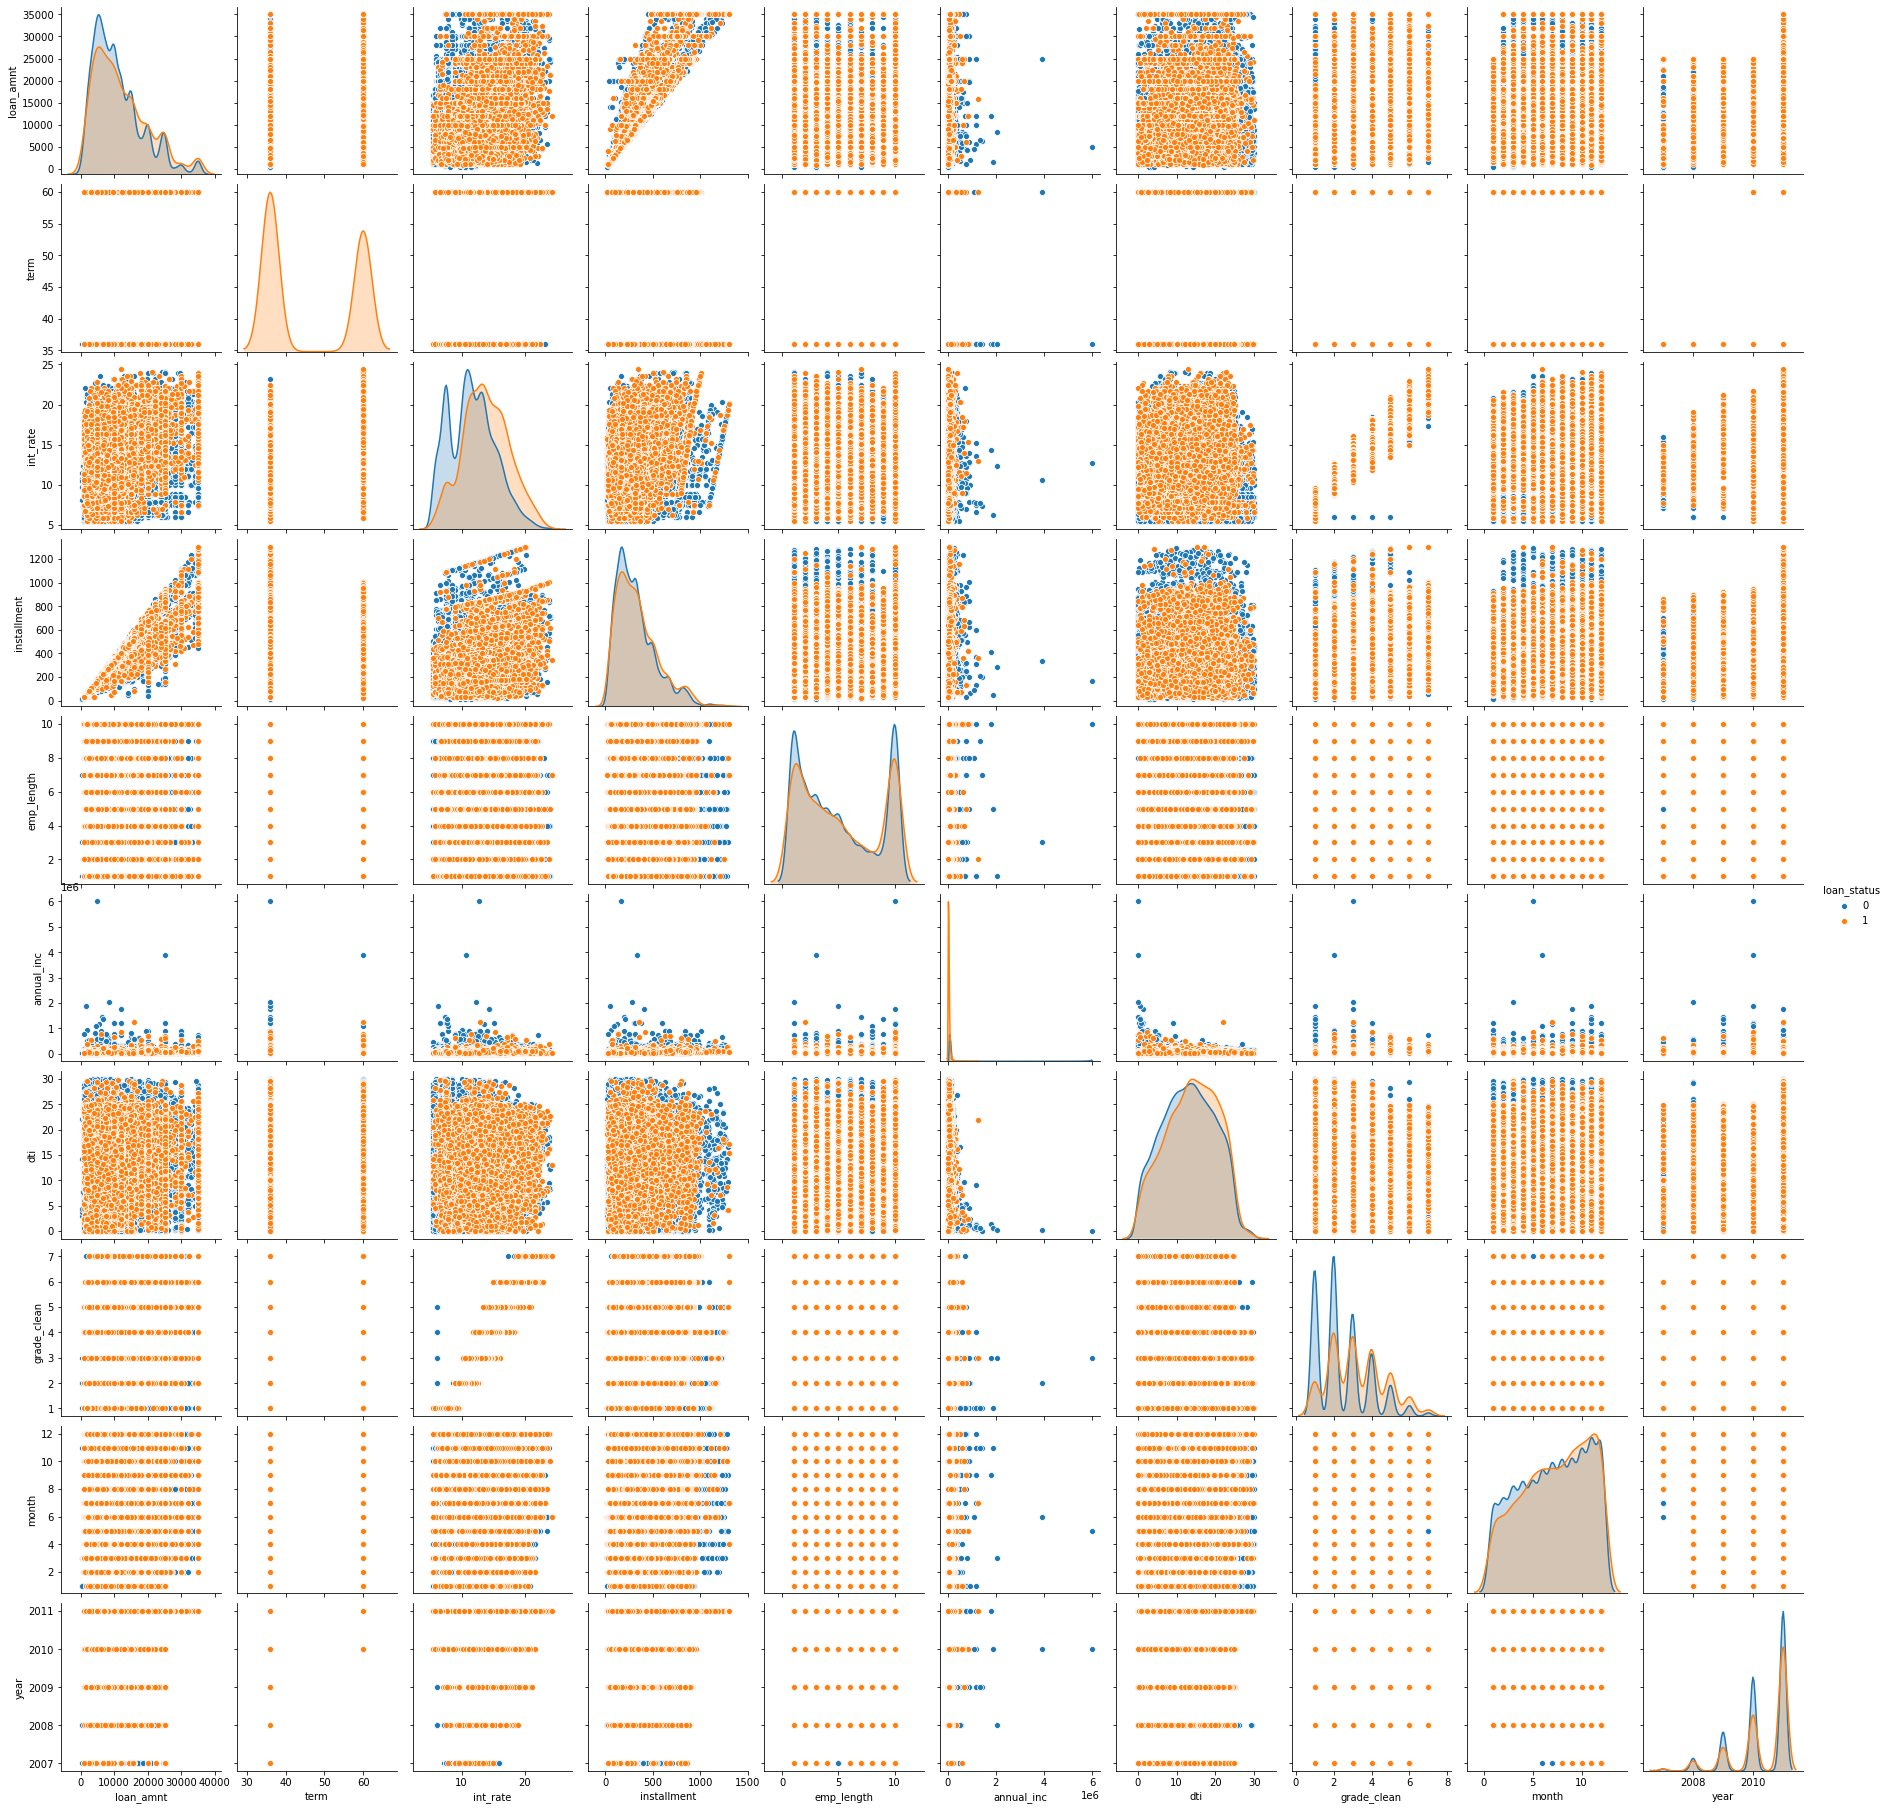

In [109]:
#sns.pairplot(df_LC[['int_rate','emp_length','loan_amnt','grade_clean','installment']])
sns.pairplot(df_LC,hue='loan_status')
plt.show()

##### Observation : There is some pattern is observed between loan amount and installment

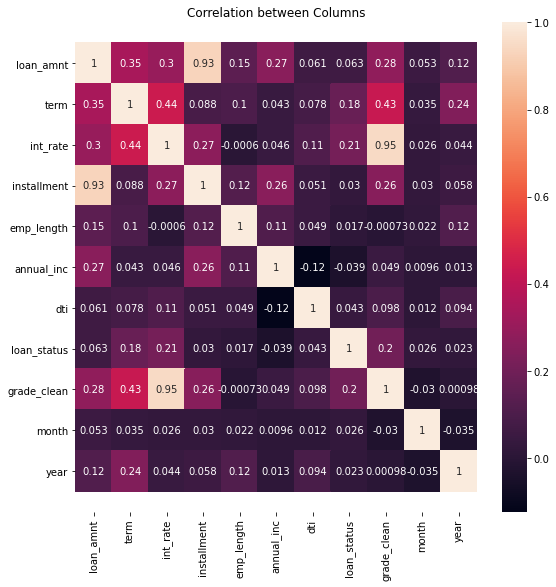

In [110]:
plt.figure(figsize=(9,9))
ax = sns.heatmap(df_LC.corr(), annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

##### Observation : 
##### 1)installment and loan amount are highly correlated
##### 2)interest rate and term are +vely corelated
##### 3)interest rate and grade are highly corelated

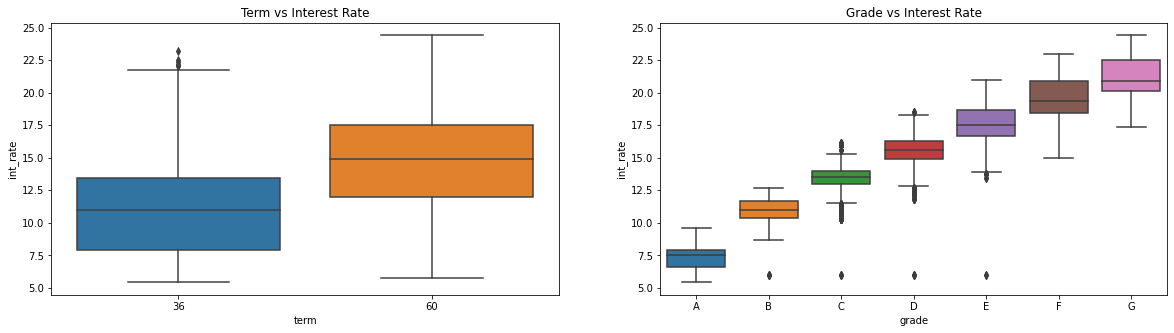

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=df_LC.int_rate, data=df_LC)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
sns.boxplot(x='grade', y=df_LC.int_rate, data=df_LC)

##### Observation : 
##### 1)The interest rates are higher for Higher tenure loans.
##### 2)Interest Rates are Higher as Grades are Lowering from A to G.

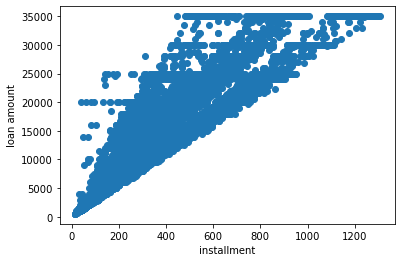

In [112]:
plt.scatter( df_LC['installment'],df_LC['loan_amnt'])
plt.xlabel('installment')
plt.ylabel('loan amount')
plt.show()

##### Observation : It has been observed that as the loan amount increases the interest rate has been increased

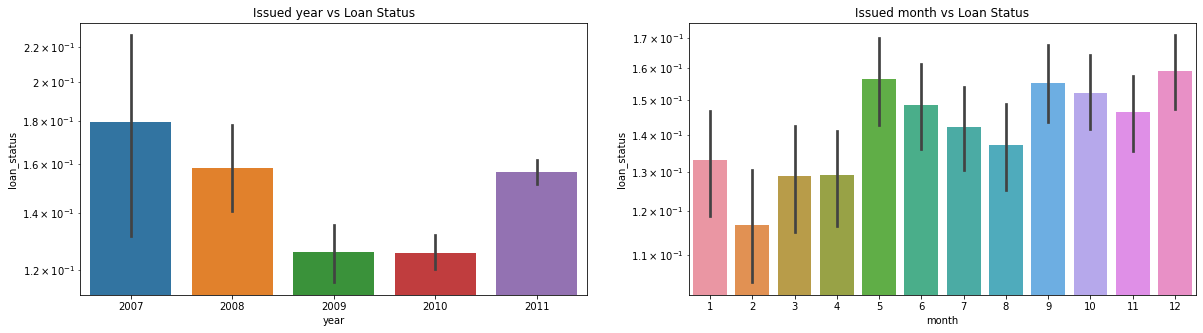

In [113]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x=df_LC.year, y=df_LC.loan_status,data=df_LC)
plt.title('Issued year vs Loan Status')
plt.yscale('log')
plt.subplot(122)
sns.barplot(x=df_LC.month, y=df_LC.loan_status, data=df_LC)
plt.title('Issued month vs Loan Status')
plt.yscale('log')
plt.show()

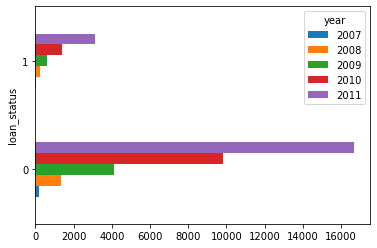

In [114]:
df_LC.groupby('year').loan_status.value_counts().unstack(0).plot.barh()
plt.show()

##### Observation : No. of Loans and defaulters are getting increased by year impling rate of defaulters increasing and hence  this field will not have much impact on the analysis

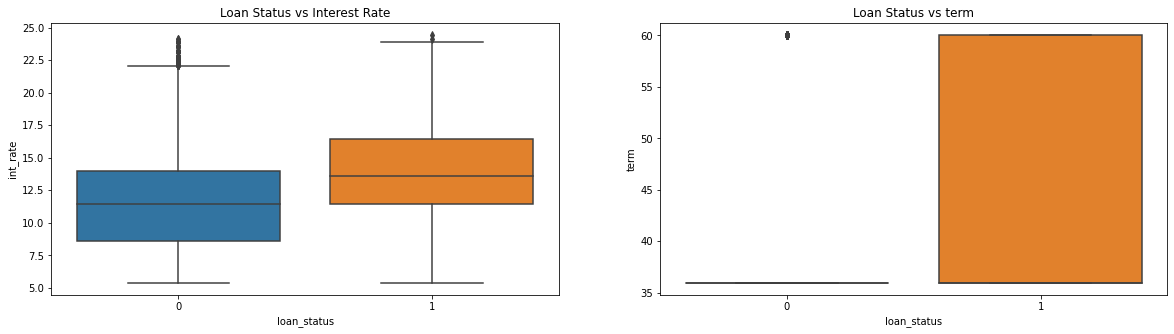

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='loan_status', y=df_LC.int_rate, data=df_LC)
plt.title('Loan Status vs Interest Rate')
plt.subplot(122)
plt.title('Loan Status vs term')
sns.boxplot(x='loan_status', y=df_LC.term, data=df_LC)

##### Observation : 
##### 1)Defaulters are having more interest rate

Text(0.5, 0, 'Ownership')

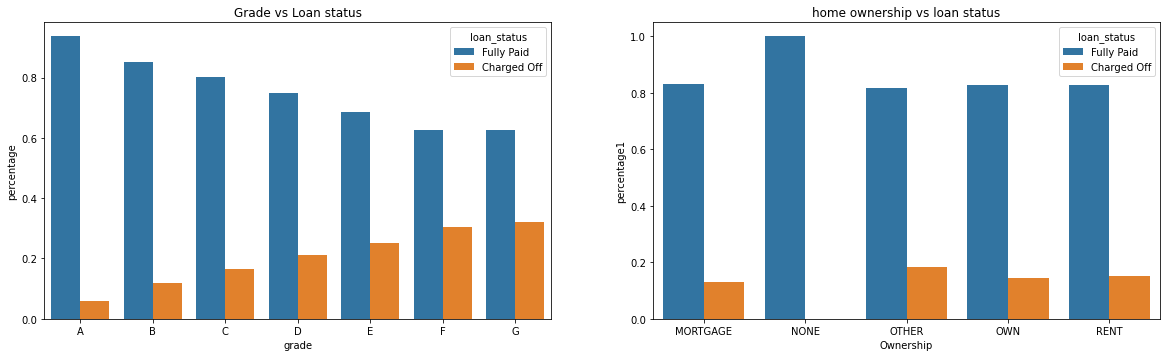

In [116]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
df = loansdata.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage']=df.groupby('grade').transform(lambda x: x/x.sum())
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')
plt.subplot(2,2,2)
plt.title('home ownership vs loan status')
df1 = loansdata.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df1['percentage1']=df1.groupby('home_ownership').transform(lambda x: x/x.sum())
sns.barplot(x='home_ownership', y='percentage1', hue='loan_status', data=df1, hue_order = ['Fully Paid', 'Charged Off'])
plt.xlabel('Ownership')

##### Observations :
##### 1) Rate of Defaulters are getting increased from A to G
##### 2) Rate of Defaulters are almost equal for all the ownership

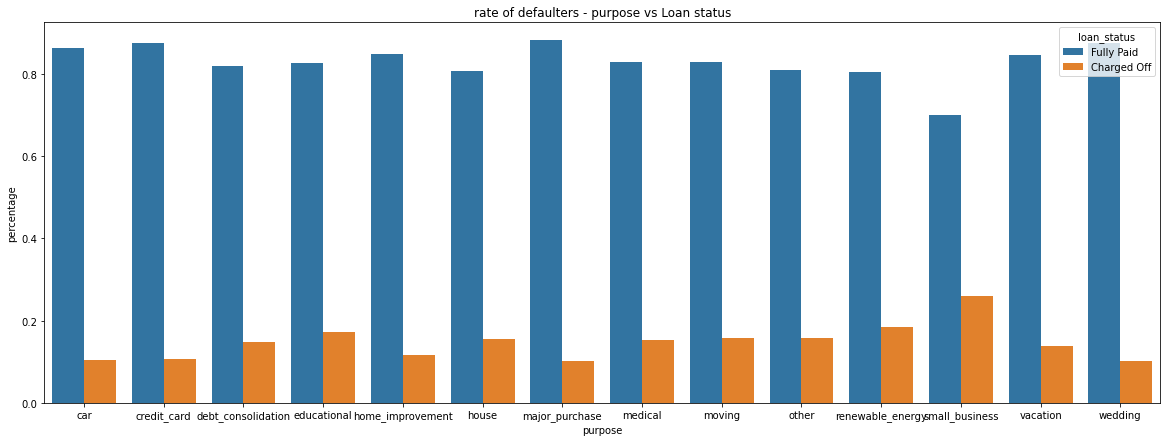

In [117]:
plt.figure(figsize=(20,7))
df = loansdata.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].count()
df['percentage']=df.groupby('purpose').transform(lambda x: x/x.sum())
sns.barplot(x='purpose', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('rate of defaulters - purpose vs Loan status')
plt.show()

##### Observation : Percentage of Small business units are getting more defaulters

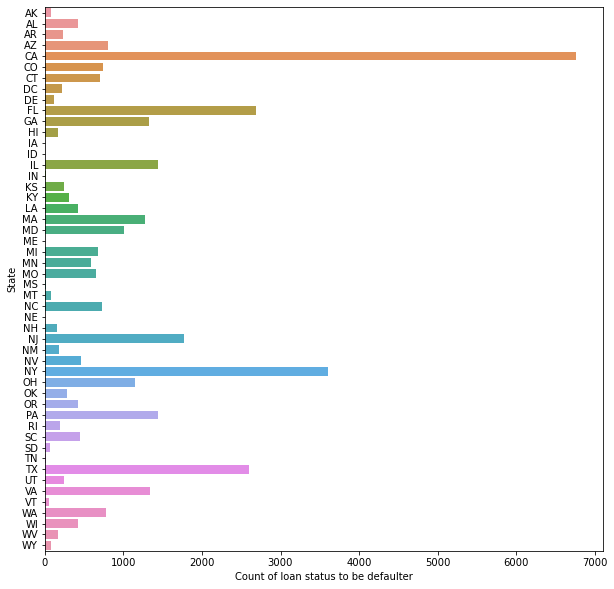

In [118]:
g = df_LC.groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

##### Observation : Applicants from the state CA, NY, FL, TX  are taken more loans

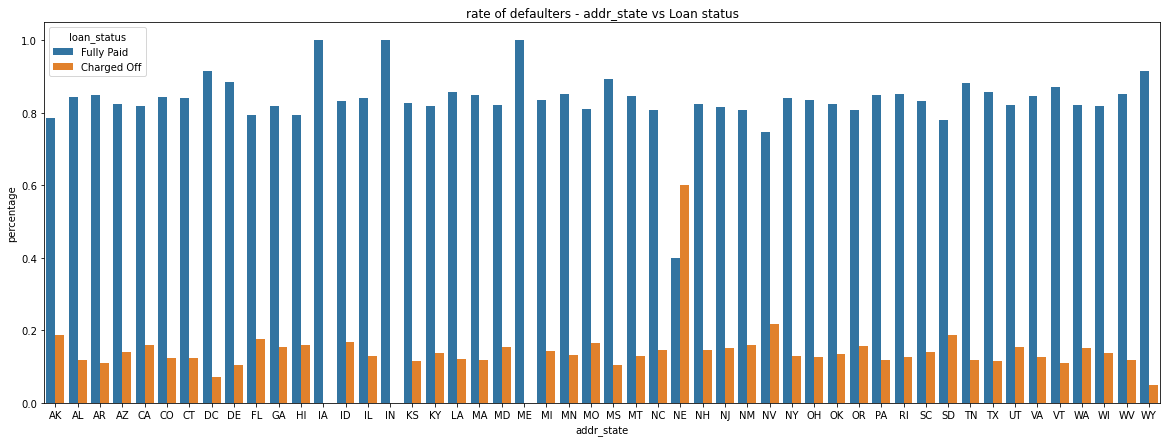

In [119]:
plt.figure(figsize=(20,7))
df = loansdata.groupby(['addr_state', 'loan_status'], as_index=False)['loan_amnt'].count()
df['percentage']=df.groupby('addr_state').transform(lambda x: x/x.sum())
sns.barplot(x='addr_state', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('rate of defaulters - addr_state vs Loan status')
plt.show()

##### Observation : Rate of defaulters are high in NE State